In [10]:
import pandas as pd
import glob
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
def readDf():
    if not os.path.exists('./concat.csv'):
        path = 'C:/Projects/Bootcamp Ödev Cevapları/Untitled Folder/mart-eylül' # get path for all files that used by EDA
        all_files = glob.glob(path + "/*.txt")
        # create empty list and append all files
        file_list = []

        for filename in all_files:
            df = pd.read_csv(filename)
            file_list.append(df)

        # Concatenate all data into one DataFrame that called "mta"
        mta = pd.concat(file_list)
        mta.columns = mta.columns.str.strip() #In case we have some unwanted spaces
        mta.to_csv('concat.csv', index=None)
        return mta
    else:
        return pd.read_csv('concat.csv')

In [12]:
mta = readDf()

In [13]:
duplicateRowsDF = mta[mta.duplicated(subset=['C/A', 'UNIT', 'SCP', 'STATION','TIME','DATE'])]
duplicateRowsDF

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
138971,R138,R293,00-02-00,34 ST-PENN STA,123ACE,IRT,02/28/2021,05:00:00,RECOVR AUD,97842133,1154644365
138973,R138,R293,00-02-00,34 ST-PENN STA,123ACE,IRT,02/28/2021,09:00:00,RECOVR AUD,97842128,1154644348
139016,R138,R293,00-02-01,34 ST-PENN STA,123ACE,IRT,02/28/2021,09:00:00,RECOVR AUD,5571049,7389769
139059,R138,R293,00-02-02,34 ST-PENN STA,123ACE,IRT,02/28/2021,09:00:00,RECOVR AUD,40396,196489
139144,R138,R293,00-02-04,34 ST-PENN STA,123ACE,IRT,02/28/2021,09:00:00,RECOVR AUD,1004247,2962827
...,...,...,...,...,...,...,...,...,...,...,...
6278200,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/19/2021,00:00:00,RECOVR AUD,1215249,140
6278203,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/19/2021,08:00:00,RECOVR AUD,1215256,140
6278205,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/19/2021,12:00:00,RECOVR AUD,1215274,140
6278207,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/19/2021,16:00:00,RECOVR AUD,1215287,140


In [14]:
mta['DATE_TIME'] = pd.to_datetime(mta["DATE"]+ " " + mta["TIME"], format='%m/%d/%Y %H:%M:%S')
mta['TURNSTILE'] = mta['C/A'] + ' ' + mta['UNIT'] + ' ' + mta['SCP'] + ' ' + mta['STATION']
mta.drop_duplicates(subset=['C/A', 'UNIT', 'SCP', 'STATION', 'DATE_TIME'], inplace=True)

In [15]:
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,03:00:00,REGULAR,7537255,2570434,2021-02-27 03:00:00,A002 R051 02-00-00 59 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,07:00:00,REGULAR,7537260,2570445,2021-02-27 07:00:00,A002 R051 02-00-00 59 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,11:00:00,REGULAR,7537285,2570500,2021-02-27 11:00:00,A002 R051 02-00-00 59 ST
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,15:00:00,REGULAR,7537354,2570546,2021-02-27 15:00:00,A002 R051 02-00-00 59 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,19:00:00,REGULAR,7537501,2570582,2021-02-27 19:00:00,A002 R051 02-00-00 59 ST


In [16]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6279677 entries, 0 to 6279882
Data columns (total 13 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       object        
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  DATE_TIME  datetime64[ns]
 12  TURNSTILE  object        
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 670.7+ MB


In [17]:
mta.shape

(6279677, 13)

In [18]:
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME', 'TURNSTILE'],
      dtype='object')

In [19]:
#Checking null values based on columns

mta.isnull().sum()

C/A          0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DIVISION     0
DATE         0
TIME         0
DESC         0
ENTRIES      0
EXITS        0
DATE_TIME    0
TURNSTILE    0
dtype: int64

In [20]:
mta.describe()

,ENTRIES,EXITS
count,6.279677e+06,6.279677e+06
mean,4.173093e+07,3.346020e+07
std,2.183711e+08,1.926419e+08
min,0.000000e+00,0.000000e+00
25%,2.188090e+05,9.744800e+04
50%,1.424042e+06,8.612790e+05
75%,6.052079e+06,3.990674e+06
max,2.147432e+09,2.133797e+09


In [21]:
#Finding maximum and minimum date in dataframe

print("Maximum date: ")
print(mta["DATE_TIME"].max())
print()
print("Minimum date: ")
print(mta["DATE_TIME"].min())

Maximum date: 
2021-09-24 23:57:20

Minimum date: 
2021-02-27 00:00:00


In [22]:
mta['DESC'].value_counts()

REGULAR       6252548
RECOVR AUD      27129
Name: DESC, dtype: int64

In [23]:
##So we don't want the recovered audits. We want regular ones.
#mta= pd.DataFrame(mta[mta.DESC=='REGULAR'])

In [24]:
mta['DESC'].value_counts()

REGULAR       6252548
RECOVR AUD      27129
Name: DESC, dtype: int64

In [25]:
mta['ENTRIES'] = mta['ENTRIES'].astype('int')
mta['EXITS'] = mta['EXITS'].astype('int')

In [26]:
mta['WEEKDAY'] = mta["DATE_TIME"].dt.day_name()

In [27]:
mta = mta[["STATION","TURNSTILE","DATE","TIME","DATE_TIME","WEEKDAY","ENTRIES","EXITS"]]
mta.sample(5)

,STATION,TURNSTILE,DATE,TIME,DATE_TIME,WEEKDAY,ENTRIES,EXITS
6257042,36 AV,R511 R091 00-00-00 36 AV,09/22/2021,00:00:00,2021-09-22 00:00:00,Wednesday,17885310,9304343
2729799,CHAMBERS ST,A069 R044 01-00-02 CHAMBERS ST,05/31/2021,08:00:00,2021-05-31 08:00:00,Monday,438095,258143
5590339,231 ST,R194 R040 00-00-03 231 ST,08/28/2021,20:00:00,2021-08-28 20:00:00,Saturday,11910795,460393
5388354,14 ST-UNION SQ,R221 R170 01-06-02 14 ST-UNION SQ,08/25/2021,17:00:00,2021-08-25 17:00:00,Wednesday,716367,932761
3952863,36 AV,R511 R091 00-03-02 36 AV,07/06/2021,04:00:00,2021-07-06 04:00:00,Tuesday,1783980,335273


In [28]:
mta.head()

,STATION,TURNSTILE,DATE,TIME,DATE_TIME,WEEKDAY,ENTRIES,EXITS
0,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,03:00:00,2021-02-27 03:00:00,Saturday,7537255,2570434
1,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,07:00:00,2021-02-27 07:00:00,Saturday,7537260,2570445
2,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,11:00:00,2021-02-27 11:00:00,Saturday,7537285,2570500
3,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,15:00:00,2021-02-27 15:00:00,Saturday,7537354,2570546
4,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,19:00:00,2021-02-27 19:00:00,Saturday,7537501,2570582


In [29]:
mta.sort_values(by='DATE_TIME')
mta['NO_OF_ENTRIES']= mta['ENTRIES'].diff()
mta['NO_OF_EXITS']= mta['EXITS'].diff()


In [30]:
mta.describe()

,ENTRIES,EXITS,NO_OF_ENTRIES,NO_OF_EXITS
count,6.279677e+06,6.279677e+06,6.279676e+06,6.279676e+06
mean,4.173093e+07,3.346020e+07,-1.199377e+00,-4.092230e-01
std,2.183711e+08,1.926419e+08,4.652105e+07,4.129563e+07
min,0.000000e+00,0.000000e+00,-2.144357e+09,-2.133741e+09
25%,2.188090e+05,9.744800e+04,2.000000e+00,4.000000e+00
50%,1.424042e+06,8.612790e+05,2.400000e+01,2.600000e+01
75%,6.052079e+06,3.990674e+06,8.100000e+01,8.400000e+01
max,2.147432e+09,2.133797e+09,2.147040e+09,2.133741e+09


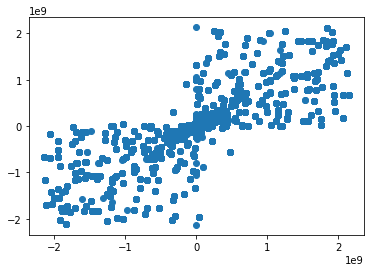

In [31]:
plt.scatter(mta['NO_OF_ENTRIES'],mta['NO_OF_EXITS'])

In [32]:
#mask_negatives = (mta.NO_OF_ENTRIES >0) & (mta.NO_OF_EXITS >0)

In [33]:
#mta = mta[mask_negatives]

In [34]:
mta['NO_OF_ENTRIES'][mta['NO_OF_ENTRIES'] < 0] = (mta["NO_OF_ENTRIES"].median())
mta['NO_OF_EXITS'][mta['NO_OF_EXITS'] < 0] = (mta["NO_OF_EXITS"].median())

<ipython-input-34-863fe97884db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta['NO_OF_ENTRIES'][mta['NO_OF_ENTRIES'] < 0] = (mta["NO_OF_ENTRIES"].median())
<ipython-input-34-863fe97884db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta['NO_OF_EXITS'][mta['NO_OF_EXITS'] < 0] = (mta["NO_OF_EXITS"].median())


In [35]:
mta.shape

(6279677, 10)

In [36]:
count = (mta.NO_OF_EXITS < 0).sum()
count2 = (mta.NO_OF_ENTRIES < 0).sum()
print("no of exits :",count,"   "," no of entries :", count2)

no of exits : 0      no of entries : 0


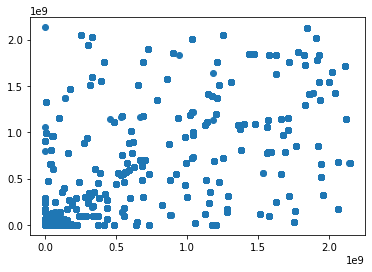

In [37]:
plt.scatter(mta['NO_OF_ENTRIES'],mta['NO_OF_EXITS'])

In [38]:
mta['NO_OF_ENTRIES'][mta['NO_OF_ENTRIES'] > (mta['NO_OF_ENTRIES'].quantile(0.98))] = mta['NO_OF_ENTRIES'].median()
mta['NO_OF_EXITS'][mta['NO_OF_EXITS'] > (mta['NO_OF_EXITS'].quantile(0.98))] = mta['NO_OF_EXITS'].median()                                             

<ipython-input-38-e9f3665fcfc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta['NO_OF_ENTRIES'][mta['NO_OF_ENTRIES'] > (mta['NO_OF_ENTRIES'].quantile(0.98))] = mta['NO_OF_ENTRIES'].median()
<ipython-input-38-e9f3665fcfc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta['NO_OF_EXITS'][mta['NO_OF_EXITS'] > (mta['NO_OF_EXITS'].quantile(0.98))] = mta['NO_OF_EXITS'].median()


In [39]:
mta['TRAFFIC'] = mta['NO_OF_ENTRIES'] + mta['NO_OF_EXITS']

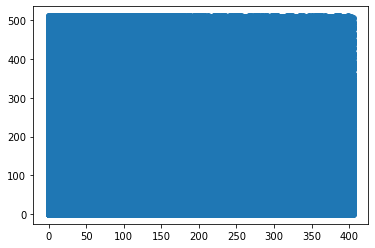

In [40]:
plt.scatter(mta['NO_OF_ENTRIES'],mta['NO_OF_EXITS'])

In [41]:
mta['NO_OF_ENTRIES'].mean()

52.864281214508516

In [42]:
mta['NO_OF_EXITS'].mean()

58.57072419022892

In [43]:
mta.NO_OF_EXITS.max()

511.0

In [44]:
mta.NO_OF_ENTRIES.median()

24.0

In [45]:
mta.NO_OF_EXITS.median()

26.0

C:\Users\osman\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NO_OF_ENTRIES', ylabel='Density'>

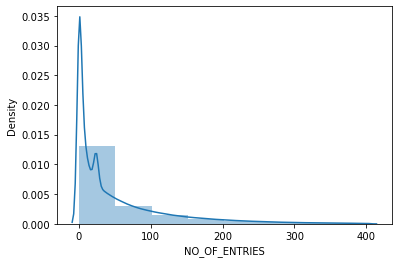

In [46]:
sns.distplot(mta['NO_OF_ENTRIES'],bins=8)

In [47]:
mta.sort_values(by=['NO_OF_ENTRIES','NO_OF_EXITS'], ascending=False).head()

,STATION,TURNSTILE,DATE,TIME,DATE_TIME,WEEKDAY,ENTRIES,EXITS,NO_OF_ENTRIES,NO_OF_EXITS,TRAFFIC
2766119,145 ST,N020 R101 00-00-05 145 ST,06/04/2021,16:00:00,2021-06-04 16:00:00,Friday,21892897,30194249,405.0,507.0,912.0
3191822,42 ST-PORT AUTH,N063A R011 00-00-01 42 ST-PORT AUTH,06/15/2021,12:00:00,2021-06-15 12:00:00,Tuesday,1281333652,179131482,405.0,496.0,901.0
2703615,FLUSHING-MAIN,R533 R055 00-03-01 FLUSHING-MAIN,05/26/2021,20:00:00,2021-05-26 20:00:00,Wednesday,4899938,2687333,405.0,491.0,896.0
820728,FLUSHING-MAIN,R533 R055 00-03-00 FLUSHING-MAIN,03/25/2021,16:00:00,2021-03-25 16:00:00,Thursday,17387641,15555729,405.0,483.0,888.0
5332823,34 ST-HERALD SQ,N506 R022 00-05-04 34 ST-HERALD SQ,08/26/2021,16:00:00,2021-08-26 16:00:00,Thursday,136458,147358,405.0,483.0,888.0


In [48]:
def divideDateTime(x):
    time = datetime.strptime(x.strftime("%y-%m-%d %H:%M:%S"), "%y-%m-%d %H:%M:%S")
    if(time.hour>18):
        return 'EVENING'
    elif(time.hour > 12):
        return 'AFTERNOON'
    elif(time.hour>6):
        return 'MORNING'
    else:
        return 'NIGHT'
        

In [49]:
mta['DAY_PART'] = mta['DATE_TIME'].apply(divideDateTime)

In [50]:
mta.head()

,STATION,TURNSTILE,DATE,TIME,DATE_TIME,WEEKDAY,ENTRIES,EXITS,NO_OF_ENTRIES,NO_OF_EXITS,TRAFFIC,DAY_PART
0,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,03:00:00,2021-02-27 03:00:00,Saturday,7537255,2570434,NaN,NaN,NaN,NIGHT
1,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,07:00:00,2021-02-27 07:00:00,Saturday,7537260,2570445,5.0,11.0,16.0,MORNING
2,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,11:00:00,2021-02-27 11:00:00,Saturday,7537285,2570500,25.0,55.0,80.0,MORNING
3,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,15:00:00,2021-02-27 15:00:00,Saturday,7537354,2570546,69.0,46.0,115.0,AFTERNOON
4,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,19:00:00,2021-02-27 19:00:00,Saturday,7537501,2570582,147.0,36.0,183.0,EVENING


In [51]:
mta.NO_OF_ENTRIES.value_counts()

0.0      1080482
24.0      296395
1.0       217199
2.0       170888
3.0       147186
          ...   
396.0        516
403.0        514
398.0        500
404.0        496
401.0        474
Name: NO_OF_ENTRIES, Length: 406, dtype: int64

In [52]:
mta.groupby(['TURNSTILE','DATE_TIME']).sum().head(10)

ENTRIES    EXITS  NO_OF_ENTRIES  \
TURNSTILE                DATE_TIME                                              
A002 R051 02-00-00 59 ST 2021-02-27 03:00:00  7537255  2570434            0.0   
                         2021-02-27 07:00:00  7537260  2570445            5.0   
                         2021-02-27 11:00:00  7537285  2570500           25.0   
                         2021-02-27 15:00:00  7537354  2570546           69.0   
                         2021-02-27 19:00:00  7537501  2570582          147.0   
                         2021-02-27 23:00:00  7537589  2570596           88.0   
                         2021-02-28 03:00:00  7537598  2570598            9.0   
                         2021-02-28 07:00:00  7537602  2570602            4.0   
                         2021-02-28 11:00:00  7537625  2570637           23.0   
                         2021-02-28 15:00:00  7537696  2570671           71.0   

                                              NO_OF_EXITS  TRAFFIC  
TURNSTILE                DATE_TIME                                  
A002 R051 02-00-00 59 ST 2021-02-27 03:00:00          0.0      0.0  
                         2021-02-27 07:00:00         11.0     16.0  
                         2021-02-27 11:00:00         55.0     80.0  
                         2021-02-27 15:00:00         46.0    115.0  
                         2021-02-27 19:00:00         36.0    183.0  
                         2021-02-27 23:00:00         14.0    102.0  
                         2021-02-28 03:00:00          2.0     11.0  
                         2021-02-28 07:00:00          4.0      8.0  
                         2021-02-28 11:00:00         35.0     58.0  
                         2021-02-28 15:00:00         34.0    105.0

In [53]:
mta.groupby(['STATION','DATE_TIME']).sum().head(10)

ENTRIES        EXITS  NO_OF_ENTRIES  \
STATION DATE_TIME                                                      
1 AV    2021-02-27 03:00:00  463206829.0  466575530.0          576.0   
        2021-02-27 07:00:00  463206891.0  466575785.0           62.0   
        2021-02-27 11:00:00  463207484.0  466577037.0          593.0   
        2021-02-27 15:00:00  463208720.0  466579167.0         1236.0   
        2021-02-27 19:00:00  463207708.0  466540376.0         1514.0   
        2021-02-27 23:00:00  463211222.0  466583146.0          988.0   
        2021-02-28 03:00:00  463211564.0  466583603.0          342.0   
        2021-02-28 07:00:00  463211604.0  466583796.0           40.0   
        2021-02-28 11:00:00  463212086.0  466584731.0          482.0   
        2021-02-28 15:00:00  463213133.0  466586563.0         1047.0   

                             NO_OF_EXITS  TRAFFIC  
STATION DATE_TIME                                  
1 AV    2021-02-27 03:00:00        628.0   1204.0  
        2021-02-27 07:00:00        255.0    317.0  
        2021-02-27 11:00:00       1252.0   1845.0  
        2021-02-27 15:00:00       2130.0   3366.0  
        2021-02-27 19:00:00       2321.0   3835.0  
        2021-02-27 23:00:00       1658.0   2646.0  
        2021-02-28 03:00:00        457.0    799.0  
        2021-02-28 07:00:00        193.0    233.0  
        2021-02-28 11:00:00        935.0   1417.0  
        2021-02-28 15:00:00       1832.0   2879.0

In [54]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6279677 entries, 0 to 6279882
Data columns (total 12 columns):
 #   Column         Dtype         
---  ------         -----         
 0   STATION        object        
 1   TURNSTILE      object        
 2   DATE           object        
 3   TIME           object        
 4   DATE_TIME      datetime64[ns]
 5   WEEKDAY        object        
 6   ENTRIES        int32         
 7   EXITS          int32         
 8   NO_OF_ENTRIES  float64       
 9   NO_OF_EXITS    float64       
 10  TRAFFIC        float64       
 11  DAY_PART       object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(6)
memory usage: 574.9+ MB


In [55]:
mta.sort_values(by='TRAFFIC', ascending= False)

,STATION,TURNSTILE,DATE,TIME,DATE_TIME,WEEKDAY,ENTRIES,EXITS,NO_OF_ENTRIES,NO_OF_EXITS,TRAFFIC,DAY_PART
2766119,145 ST,N020 R101 00-00-05 145 ST,06/04/2021,16:00:00,2021-06-04 16:00:00,Friday,21892897,30194249,405.0,507.0,912.0,AFTERNOON
5387921,14 ST-UNION SQ,R221 R170 01-00-00 14 ST-UNION SQ,08/21/2021,17:00:00,2021-08-21 17:00:00,Saturday,16874042,10099498,399.0,511.0,910.0,AFTERNOON
4239666,42 ST-PORT AUTH,N063A R011 00-00-01 42 ST-PORT AUTH,07/21/2021,12:00:00,2021-07-21 12:00:00,Wednesday,1281372789,179252802,402.0,508.0,910.0,MORNING
1047829,34 ST-HERALD SQ,A025 R023 01-06-00 34 ST-HERALD SQ,04/07/2021,20:00:00,2021-04-07 20:00:00,Wednesday,21397,59224,399.0,510.0,909.0,EVENING
4867782,42 ST-PORT AUTH,N063A R011 00-00-01 42 ST-PORT AUTH,08/12/2021,12:00:00,2021-08-12 12:00:00,Thursday,1281397467,179329765,404.0,504.0,908.0,MORNING
...,...,...,...,...,...,...,...,...,...,...,...,...
5335527,B'WAY-LAFAYETTE,N519A R461 01-05-02 B'WAY-LAFAYETTE,08/22/2021,17:00:00,2021-08-22 17:00:00,Sunday,1928603499,1544057837,0.0,0.0,0.0,AFTERNOON
5335528,B'WAY-LAFAYETTE,N519A R461 01-05-02 B'WAY-LAFAYETTE,08/22/2021,21:00:00,2021-08-22 21:00:00,Sunday,1928603499,1544057837,0.0,0.0,0.0,EVENING
5335529,B'WAY-LAFAYETTE,N519A R461 01-05-02 B'WAY-LAFAYETTE,08/23/2021,01:00:00,2021-08-23 01:00:00,Monday,1928603499,1544057837,0.0,0.0,0.0,NIGHT
6279882,RIT-ROOSEVELT,TRAM2 R469 00-05-01 RIT-ROOSEVELT,09/24/2021,21:00:00,2021-09-24 21:00:00,Friday,5554,646,0.0,0.0,0.0,EVENING


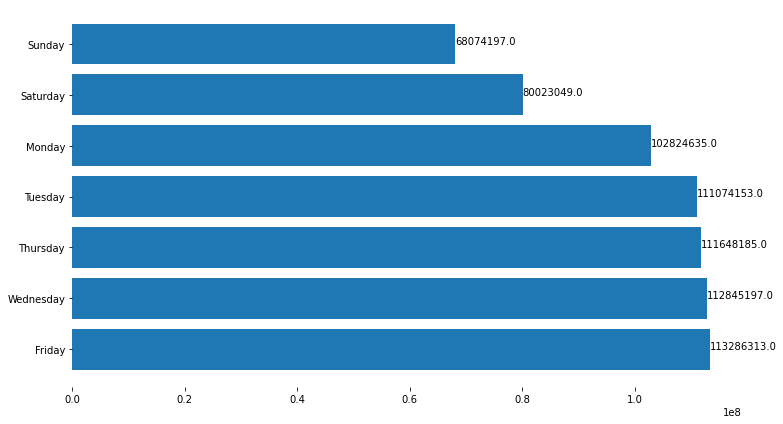

In [56]:
week_day_traffic =pd.DataFrame(mta.groupby('WEEKDAY')['TRAFFIC'].sum().sort_values(ascending=False).reset_index())
plt.figure(figsize =(12, 7))
plt.box(False)
plt.barh(week_day_traffic['WEEKDAY'],week_day_traffic['TRAFFIC'])

for index, value in enumerate(week_day_traffic['TRAFFIC']):
    plt.text(value, index, str(value))

In [57]:
most_seven_station = pd.DataFrame(mta.groupby('STATION')['TRAFFIC'].sum().sort_values(ascending=False).reset_index())
most_seven_station.head(7)

,STATION,TRAFFIC
0,34 ST-PENN STA,17085735.0
1,86 ST,11570693.0
2,GRD CNTRL-42 ST,11527024.0
3,34 ST-HERALD SQ,11429434.0
4,125 ST,11406438.0
5,23 ST,11320909.0
6,14 ST-UNION SQ,10486178.0


In [58]:
top_seven = ('34 ST-PENN STA','86 ST','GRD CNTRL-42 ST','34 ST-HERALD SQ','125 ST','23 ST','14 ST-UNION SQ')

In [59]:
most_crowded_hours = pd.DataFrame(mta.groupby('TIME')['TRAFFIC'].sum().sort_values(ascending=False).reset_index())
most_crowded_hours.tail(15)

,TIME,TRAFFIC
78138,00:31:55,0.0
78139,04:17:49,0.0
78140,08:06:59,0.0
78141,22:58:13,0.0
78142,05:47:17,0.0
78143,13:39:58,0.0
78144,02:50:56,0.0
78145,08:48:12,0.0
78146,04:17:36,0.0
78147,00:31:34,0.0


In [60]:
most_traffic_daypart = pd.DataFrame(mta.groupby('DAY_PART')['TRAFFIC'].sum().sort_values(ascending=False).reset_index())
most_traffic_daypart.head()

,DAY_PART,TRAFFIC
0,AFTERNOON,231588408.0
1,MORNING,196126097.0
2,EVENING,185838760.0
3,NIGHT,86222464.0


In [61]:
mta['STATION'] = mta['STATION'].astype('string')
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6279677 entries, 0 to 6279882
Data columns (total 12 columns):
 #   Column         Dtype         
---  ------         -----         
 0   STATION        string        
 1   TURNSTILE      object        
 2   DATE           object        
 3   TIME           object        
 4   DATE_TIME      datetime64[ns]
 5   WEEKDAY        object        
 6   ENTRIES        int32         
 7   EXITS          int32         
 8   NO_OF_ENTRIES  float64       
 9   NO_OF_EXITS    float64       
 10  TRAFFIC        float64       
 11  DAY_PART       object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(5), string(1)
memory usage: 574.9+ MB


In [62]:
top_seven_df = pd.DataFrame(mta[mta['STATION'].isin(top_seven)])
top_seven_df.sample(10)

,STATION,TURNSTILE,DATE,TIME,DATE_TIME,WEEKDAY,ENTRIES,EXITS,NO_OF_ENTRIES,NO_OF_EXITS,TRAFFIC,DAY_PART
2885726,86 ST,R250 R179 00-00-00 86 ST,06/03/2021,12:00:00,2021-06-03 12:00:00,Thursday,10447493,3871539,187.0,469.0,656.0,MORNING
5234873,34 ST-HERALD SQ,A025 R023 01-00-01 34 ST-HERALD SQ,08/24/2021,16:00:00,2021-08-24 16:00:00,Tuesday,14334161,6161730,260.0,164.0,424.0,AFTERNOON
2885388,86 ST,R249 R179 01-00-04 86 ST,06/03/2021,04:00:00,2021-06-03 04:00:00,Thursday,909032766,1875754849,7.0,26.0,33.0,NIGHT
3559387,34 ST-HERALD SQ,A025 R023 01-06-02 34 ST-HERALD SQ,07/01/2021,16:00:00,2021-07-01 16:00:00,Thursday,567575,197104,38.0,53.0,91.0,AFTERNOON
4771071,86 ST,R250 R179 00-00-05 86 ST,07/31/2021,04:00:00,2021-07-31 04:00:00,Saturday,59892,18218,0.0,5.0,5.0,NIGHT
1809944,23 ST,R132 R190 01-00-03 23 ST,04/27/2021,09:00:00,2021-04-27 09:00:00,Tuesday,126691,383916,32.0,196.0,228.0,MORNING
101537,34 ST-HERALD SQ,N507 R023 00-03-01 34 ST-HERALD SQ,03/03/2021,23:00:00,2021-03-03 23:00:00,Wednesday,3238641,4365038,11.0,24.0,35.0,EVENING
1621109,23 ST,R227A R131 01-00-01 23 ST,04/19/2021,09:00:00,2021-04-19 09:00:00,Monday,5590230,2283466,45.0,53.0,98.0,MORNING
997262,GRD CNTRL-42 ST,R240 R047 00-00-00 GRD CNTRL-42 ST,03/28/2021,09:00:00,2021-03-28 09:00:00,Sunday,5761120,15975034,22.0,125.0,147.0,MORNING
1008854,125 ST,R304 R206 00-00-00 125 ST,03/28/2021,17:00:00,2021-03-28 17:00:00,Sunday,1690600008,789705280,24.0,79.0,103.0,AFTERNOON


In [63]:
top_seven_df['STATION'].value_counts()

34 ST-PENN STA     128182
GRD CNTRL-42 ST    113175
23 ST               91958
86 ST               81904
34 ST-HERALD SQ     68127
125 ST              52918
14 ST-UNION SQ      51654
Name: STATION, dtype: Int64

In [64]:
most_seven_daypart = pd.DataFrame(top_seven_df.groupby('DAY_PART')['TRAFFIC'].sum().sort_values(ascending=False).reset_index())
most_seven_daypart.head()

,DAY_PART,TRAFFIC
0,AFTERNOON,29432725.0
1,MORNING,22832425.0
2,EVENING,22612518.0
3,NIGHT,9948743.0


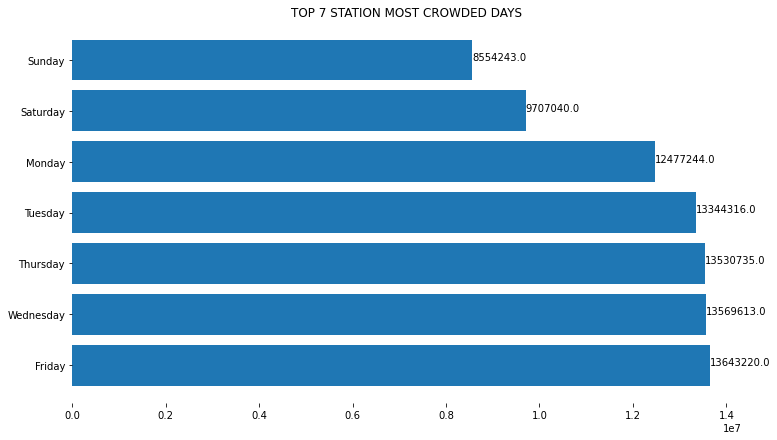

In [65]:
week_day_traffic =pd.DataFrame(top_seven_df.groupby('WEEKDAY')['TRAFFIC'].sum().sort_values(ascending=False).reset_index())
plt.figure(figsize =(12, 7))
plt.title('TOP 7 STATION MOST CROWDED DAYS')
plt.box(False)
plt.barh(week_day_traffic['WEEKDAY'],week_day_traffic['TRAFFIC'])

for index, value in enumerate(week_day_traffic['TRAFFIC']):
    plt.text(value, index, str(value))

<BarContainer object of 7 artists>

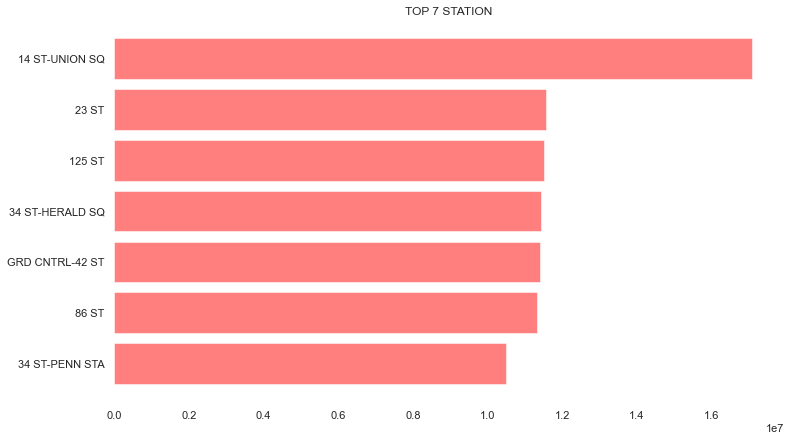

In [86]:
top_seven_sorted = pd.DataFrame(top_seven_df.groupby('STATION')['TRAFFIC'].sum().sort_values(ascending=False).reset_index())
plt.figure(figsize =(12, 7))
plt.title('TOP 7 STATION')
plt.box(False)
plt.barh(top_seven_sorted['STATION'],sorted(top_seven_sorted['TRAFFIC']),color='red', alpha=0.5)

In [66]:
mta_top7_daily = top_seven_df.groupby(["STATION","WEEKDAY"]).sum()
week_day_traffic_heatmap =mta_top7_daily.groupby(['WEEKDAY','STATION'])['TRAFFIC'].sum().reset_index()
week_day_traffic_heatmap = week_day_traffic_heatmap.groupby(["STATION","WEEKDAY"]).TRAFFIC.mean().reset_index()
mta_top7_heatmap = week_day_traffic_heatmap.pivot("WEEKDAY","STATION","TRAFFIC")
mta_top7_heatmap = mta_top7_heatmap.reindex(index = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

mta_top7_heatmap.head(10)

STATION,125 ST,14 ST-UNION SQ,23 ST,34 ST-HERALD SQ,34 ST-PENN STA,86 ST,GRD CNTRL-42 ST
WEEKDAY,,,,,,,
Monday,1693895.0,1511810.0,1636223.0,1666890.0,2529616.0,1715964.0,1722846.0
Tuesday,1798949.0,1562791.0,1848222.0,1735675.0,2671150.0,1838264.0,1889265.0
Wednesday,1801735.0,1622935.0,1891714.0,1776122.0,2689926.0,1870733.0,1916448.0
Thursday,1792932.0,1603102.0,1881186.0,1781622.0,2702385.0,1859580.0,1909928.0
Friday,1838776.0,1625402.0,1888086.0,1812697.0,2759971.0,1867575.0,1850713.0
Saturday,1303809.0,1350060.0,1211428.0,1355204.0,1959678.0,1291657.0,1235204.0
Sunday,1176342.0,1210078.0,964050.0,1301224.0,1773009.0,1126920.0,1002620.0


In [67]:
week_day_traffic_heatmap.tail()

,STATION,WEEKDAY,TRAFFIC
44,GRD CNTRL-42 ST,Saturday,1235204.0
45,GRD CNTRL-42 ST,Sunday,1002620.0
46,GRD CNTRL-42 ST,Thursday,1909928.0
47,GRD CNTRL-42 ST,Tuesday,1889265.0
48,GRD CNTRL-42 ST,Wednesday,1916448.0


Text(0.5, 1.0, 'Top 7 Busiest Stations / Day')

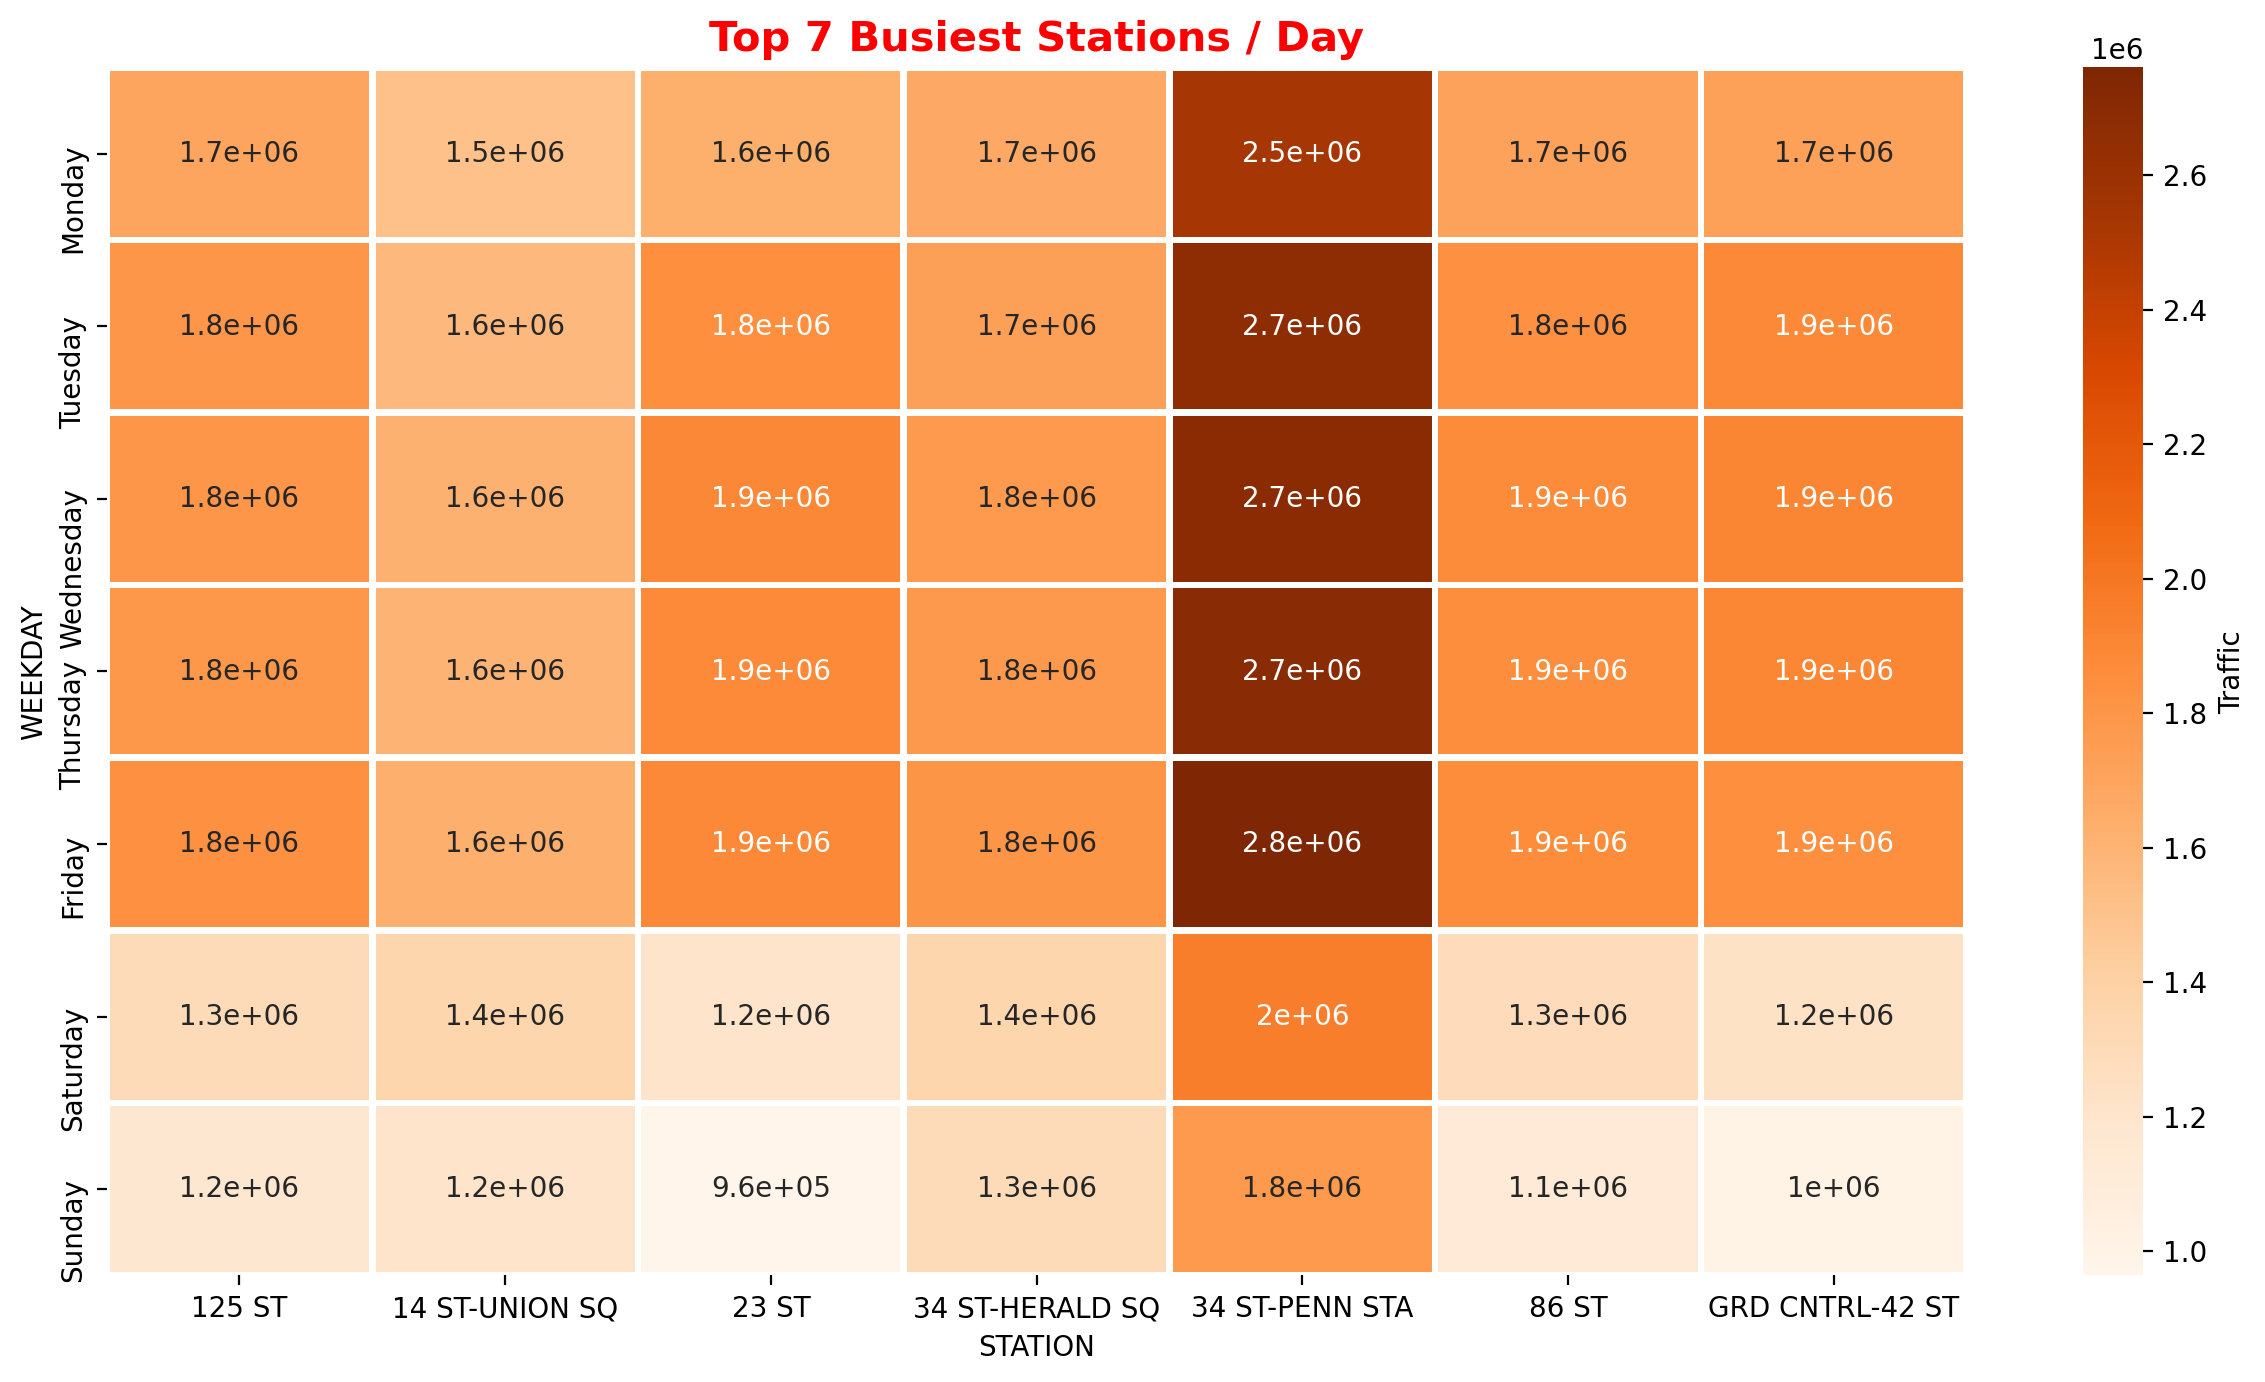

In [68]:
plt.figure(figsize=(15,8),dpi=200)
sns.heatmap(mta_top7_heatmap,annot=True, linewidths=2, cmap="Oranges",cbar_kws={'label': 'Traffic'})
plt.title("Top 7 Busiest Stations / Day",weight="bold",c="red", fontsize=15)

In [69]:
mta_top7_daily = top_seven_df.groupby(["STATION","DAY_PART"]).sum()
week_day_traffic_heatmap =mta_top7_daily.groupby(['DAY_PART','STATION'])['TRAFFIC'].sum().reset_index()
week_day_traffic_heatmap = week_day_traffic_heatmap.groupby(["STATION","DAY_PART"]).TRAFFIC.mean().reset_index()
mta_top7_heatmap = week_day_traffic_heatmap.pivot("DAY_PART","STATION","TRAFFIC")
mta_top7_heatmap = mta_top7_heatmap.reindex(index = ["MORNING","AFTERNOON","EVENING","NIGHT"])

mta_top7_heatmap.head(10)


STATION,125 ST,14 ST-UNION SQ,23 ST,34 ST-HERALD SQ,34 ST-PENN STA,86 ST,GRD CNTRL-42 ST
DAY_PART,,,,,,,
MORNING,3022022.0,1628351.0,2798155.0,3670037.0,5120958.0,3400893.0,3192009.0
AFTERNOON,4083163.0,5068144.0,4090300.0,2975992.0,5526340.0,3638208.0,4050578.0
EVENING,2879627.0,2643766.0,3252589.0,3159092.0,4468094.0,3241317.0,2968033.0
NIGHT,1421626.0,1145917.0,1179865.0,1624313.0,1970343.0,1290275.0,1316404.0


Text(0.5, 1.0, 'Top 7 Busiest Stations / Day Part')

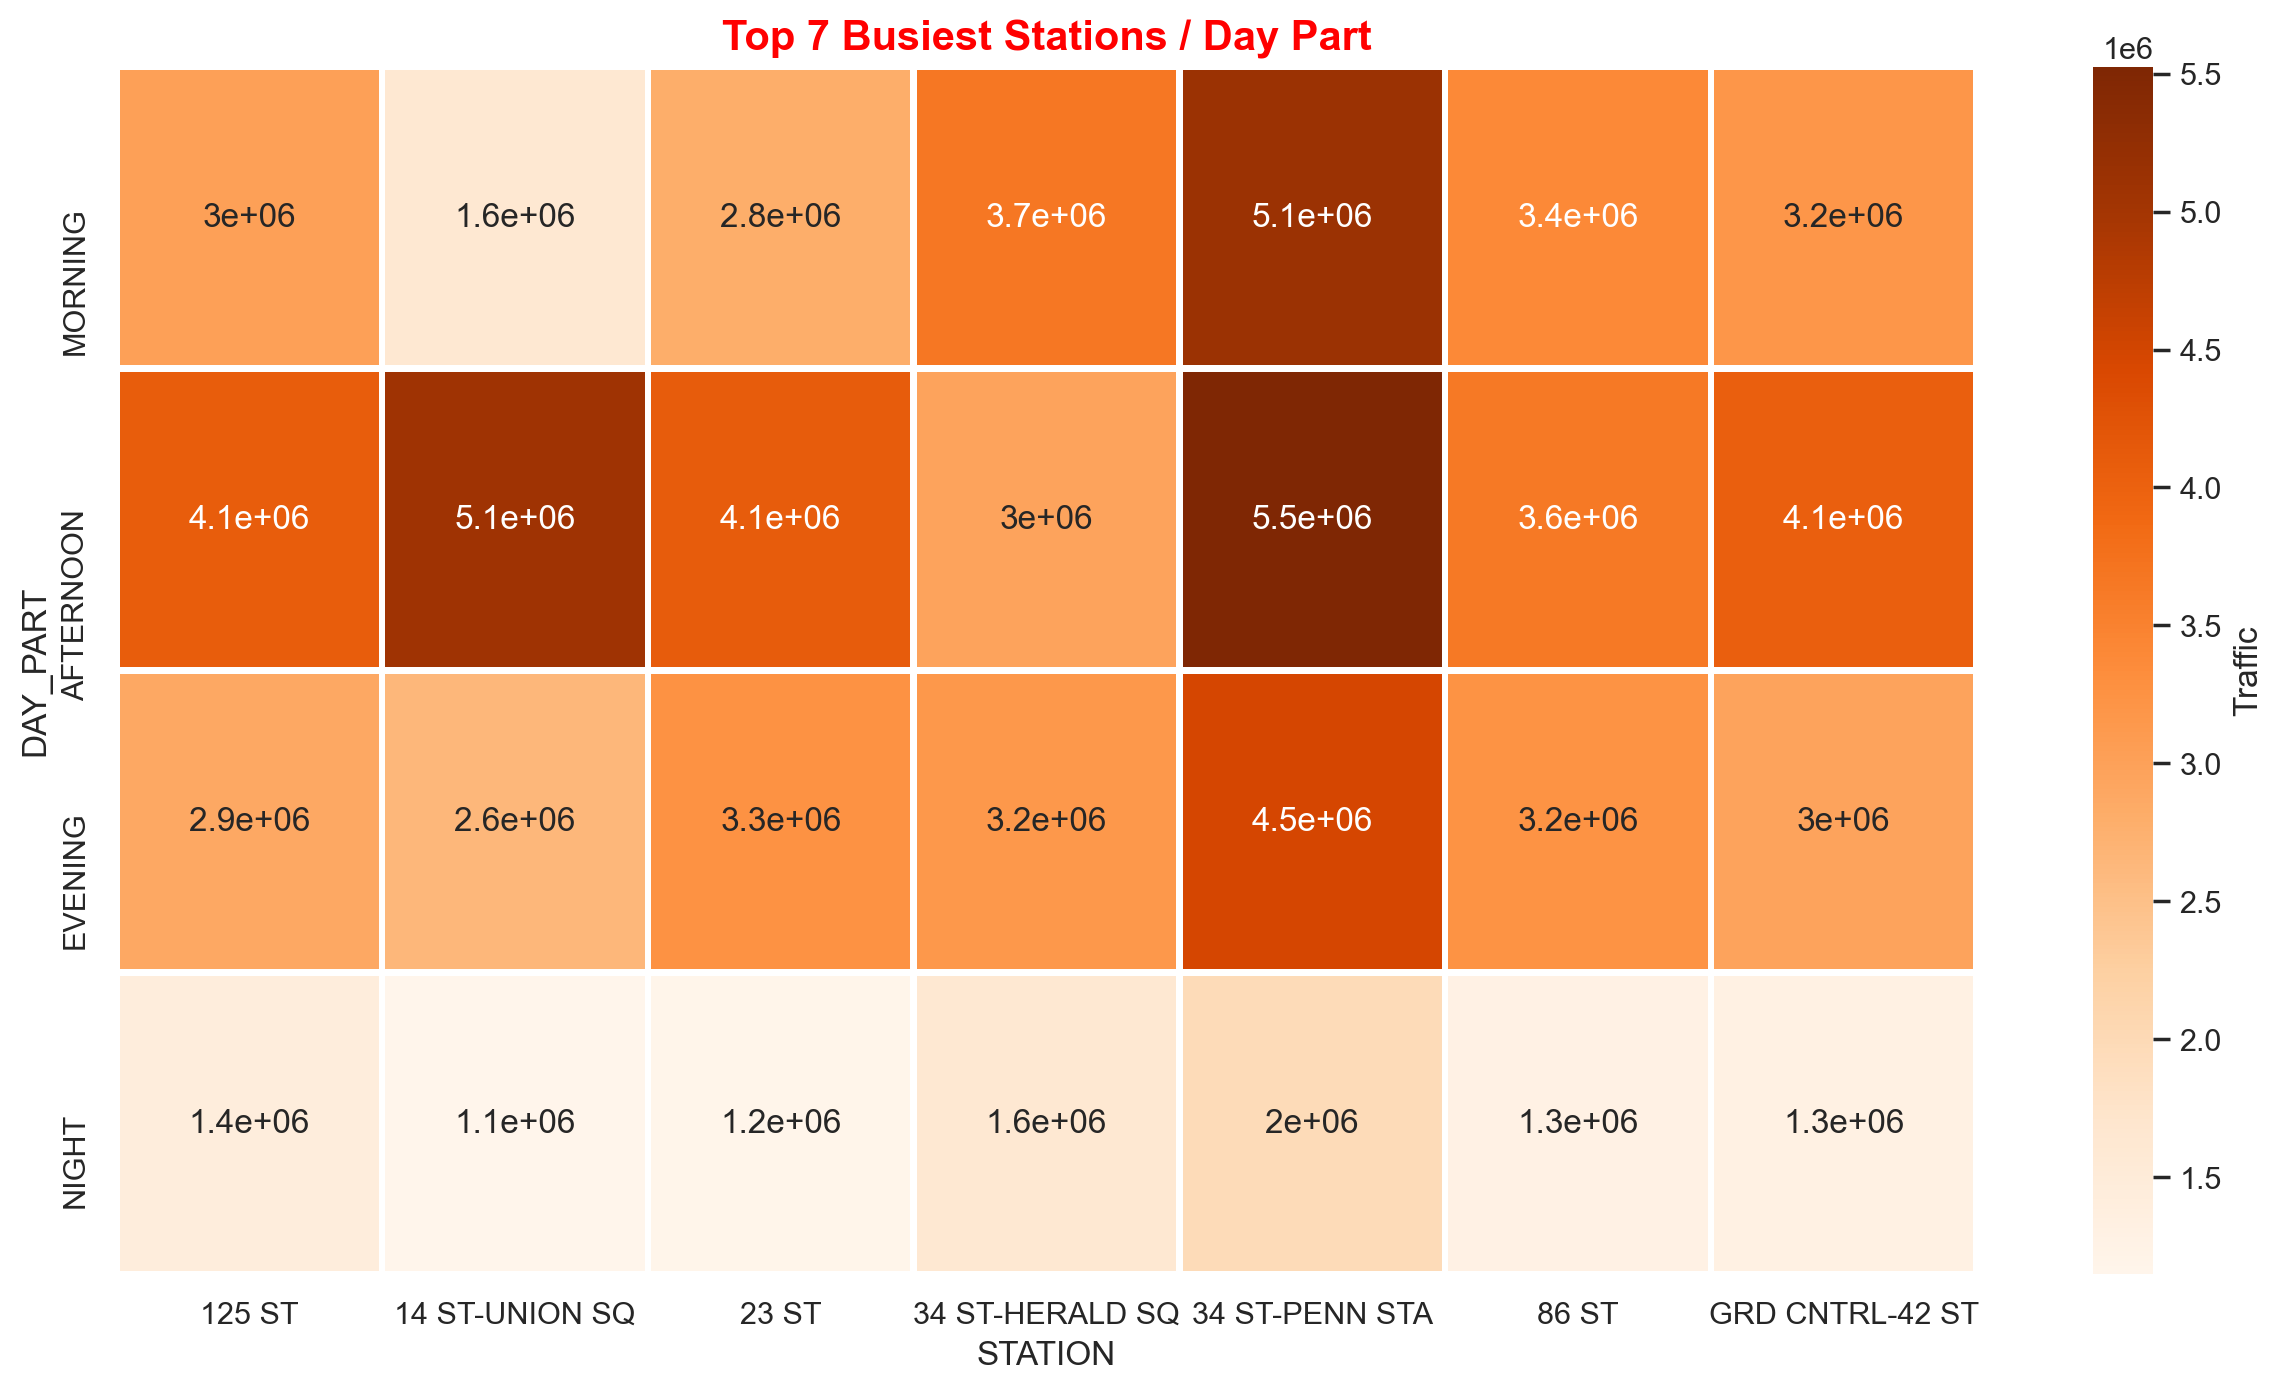

In [78]:
plt.figure(figsize=(15,8),dpi=200)
sns.heatmap(mta_top7_heatmap,annot=True, linewidths=2, cmap="Oranges",cbar_kws={'label': 'Traffic'})
plt.title("Top 7 Busiest Stations / Day Part",weight="bold",c="red", fontsize=15)

In [71]:
mta_top7_daily = top_seven_df.groupby(["STATION","DAY_PART","WEEKDAY"]).sum()
week_day_traffic_heatmap =mta_top7_daily.groupby(['DAY_PART','STATION',"WEEKDAY"])['TRAFFIC'].sum().reset_index()
week_day_traffic_heatmap = week_day_traffic_heatmap.groupby(["STATION","DAY_PART","WEEKDAY"]).TRAFFIC.mean().reset_index()
week_day_traffic_heatmap.sample(10)

week_day_traffic_heatmap.rename(columns={"DAY_PART": "DPART", "WEEKDAY": "WDAY"},inplace=True)


In [72]:
week_day_traffic_heatmap['WDAY'] = week_day_traffic_heatmap['WDAY'].replace(['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday'], ['Snd', 'Mnd', 'Tue', 'Wdn','Thu','Fri','Sat'])

In [73]:
week_day_traffic_heatmap.head()

,STATION,DPART,WDAY,TRAFFIC
0,125 ST,AFTERNOON,Fri,646612.0
1,125 ST,AFTERNOON,Mnd,596157.0
2,125 ST,AFTERNOON,Sat,529441.0
3,125 ST,AFTERNOON,Snd,431285.0
4,125 ST,AFTERNOON,Thu,621925.0


In [74]:
week_day_traffic_heatmap['DPART'] = week_day_traffic_heatmap['DPART'].replace(['AFTERNOON', 'NIGHT', 'MORNING', 'EVENING'], ['AN', 'NI', 'MO', 'EG'])
week_day_traffic_heatmap.head()

,STATION,DPART,WDAY,TRAFFIC
0,125 ST,AN,Fri,646612.0
1,125 ST,AN,Mnd,596157.0
2,125 ST,AN,Sat,529441.0
3,125 ST,AN,Snd,431285.0
4,125 ST,AN,Thu,621925.0


In [75]:
#sns.catplot(data=week_day_traffic_heatmap,kind='bar',x='TRAFFIC',y='STATION',hue="WEEKDAY")

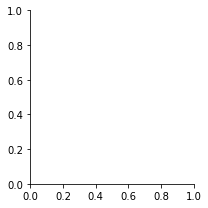

In [76]:
sns.FacetGrid(week_day_traffic_heatmap)

C:\Users\osman\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


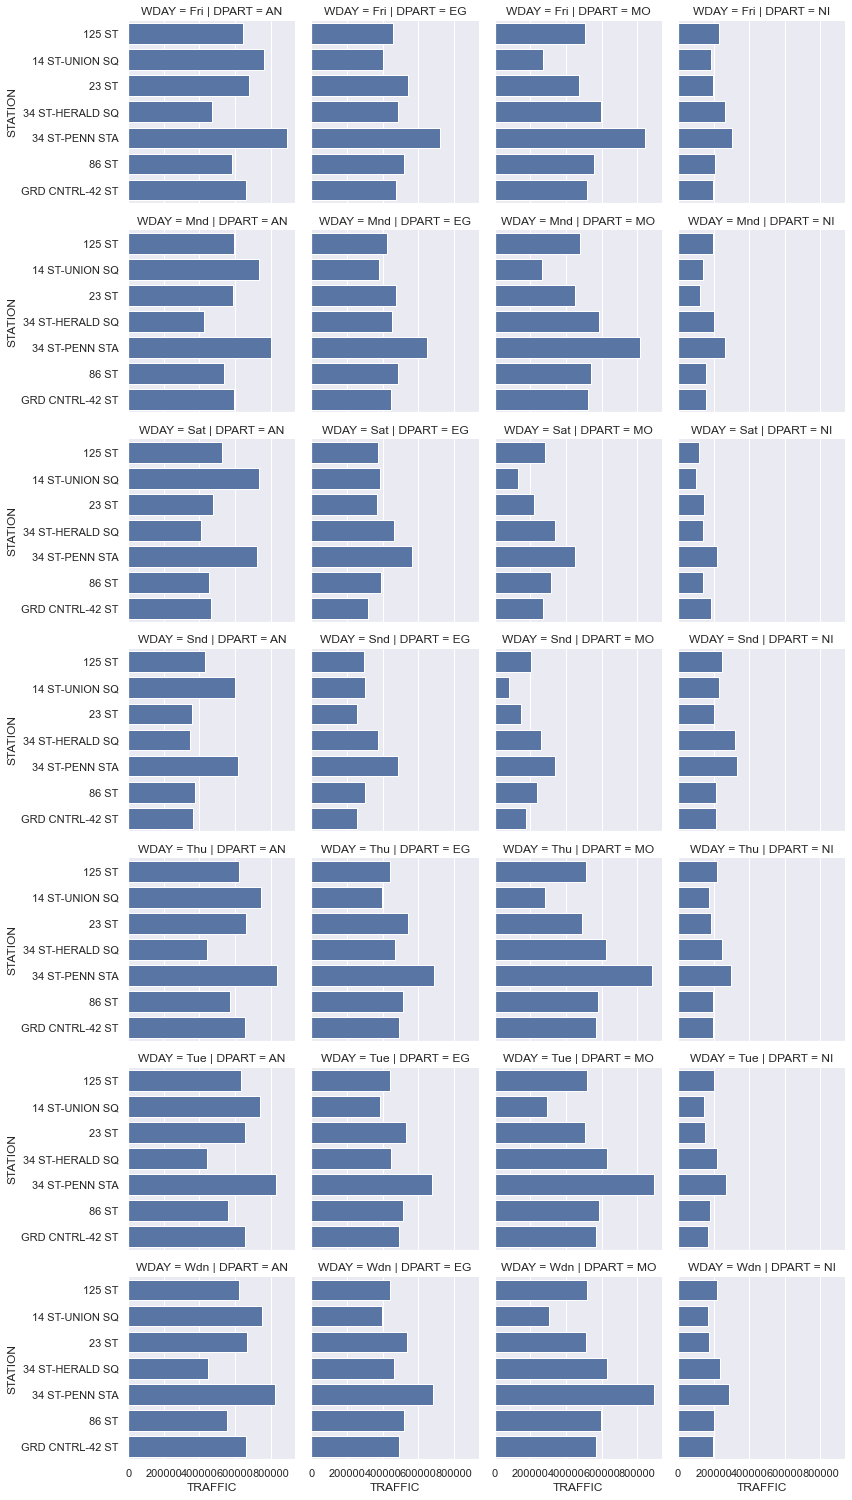

In [77]:
sns.set(rc={'figure.figsize':(120,60)})
#plt.figure(figsize = (30,16))
g = sns.FacetGrid(week_day_traffic_heatmap, col="DPART", row="WDAY")
g.map(sns.barplot, "TRAFFIC", "STATION")
plt.savefig('foo.png')